<a href="https://colab.research.google.com/github/RicardoArath/RicardoArath.github.io/blob/main/A1_2_Regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introducción
1.1 Objetivo del Estudio
El presente análisis busca determinar si existe una asociación significativa lineal entre el Producto Interno Bruto y la felicidad nacional, y posteriormente extender el modelo incorporando variables adicionales para desarrollar un análisis de regresión lineal múltiple.

1.2 Conjunto de Datos

El análisis se basa en datos de 137 países con las siguientes variables:

**Felicidad**: Puntuación del World Happiness Report 2022 (escala 0-10)
**GDP**: Producto Interno Bruto 2020 (USD)


2. Desarrollo
2.1 Exploración Inicial de Datos
Primero cargamos y exploramos los datos para entender su estructura:

In [2]:
import pandas as pd
import numpy as np

# Cargar datos
data = pd.read_csv('A1.2_Felicidad_y_GDP.csv')

# Visualizar primeras filas
print(data.head())
print(f"\nDimensiones: {data.shape}")
print(f"\nEstadísticas descriptivas:\n{data.describe()}")

          Pais  Felicidad           GDP
0      Finland     7.8210  2.718370e+11
1      Denmark     7.6362  3.560850e+11
2      Iceland     7.5575  2.171808e+10
3  Switzerland     7.5116  7.522480e+11
4  Netherlands     7.4149  9.138650e+11

Dimensiones: (141, 3)

Estadísticas descriptivas:
        Felicidad           GDP
count  141.000000  1.410000e+02
mean     5.560004  5.889942e+11
std      1.098011  2.221612e+12
min      2.403800  1.223876e+09
25%      4.887900  1.805117e+10
50%      5.585300  6.215800e+10
75%      6.309100  3.452960e+11
max      7.821000  2.089370e+13


Observaciones clave:

* 137 países con datos completos
* Felicidad: rango de 2.40 a 7.82, media de 5.54
* GDP: rango extremadamente amplio (más de 4 órdenes de magnitud)

Debido a la disparidad en los valores del GDP, aplicamos una transformación logarítmica:

In [4]:
# Transformación logarítmica del GDP
data['log_GDP'] = np.log10(data['GDP'])

2.2 Visualización Exploratoria
Para entender la relación entre las variables, generamos gráficos exploratorios:

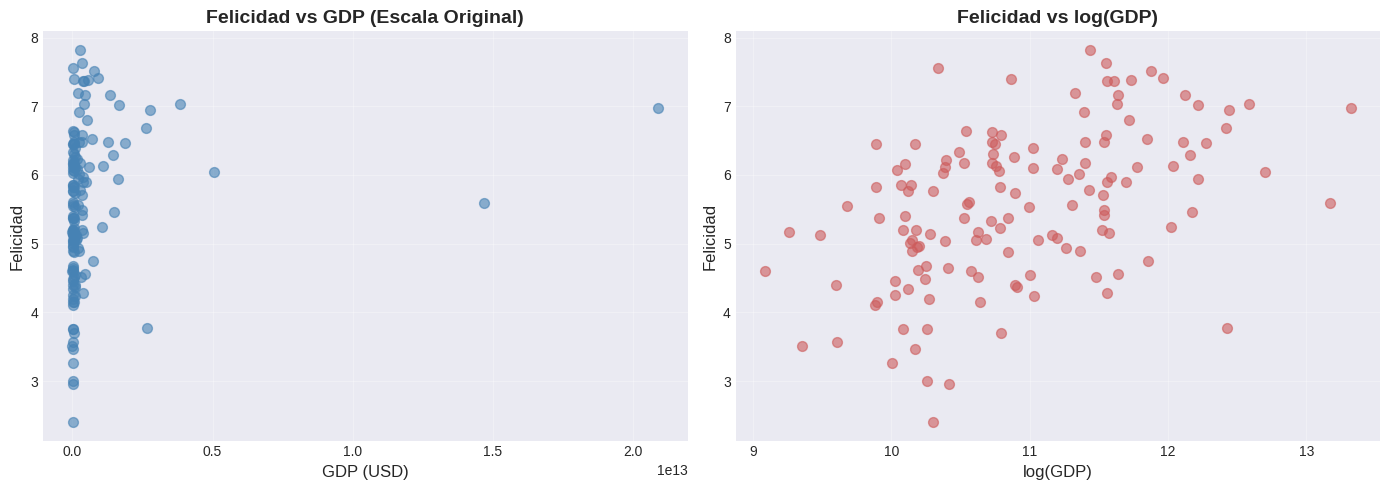

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
plt.style.use('seaborn-v0_8-darkgrid')

# Crear figura con 2 subgráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Felicidad vs GDP (escala original)
axes[0].scatter(data['GDP'], data['Felicidad'], alpha=0.6, s=50, color='steelblue')
axes[0].set_xlabel('GDP (USD)', fontsize=12)
axes[0].set_ylabel('Felicidad', fontsize=12)
axes[0].set_title('Felicidad vs GDP (Escala Original)', fontsize=14, fontweight='bold')
axes[0].ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Felicidad vs log(GDP)
axes[1].scatter(data['log_GDP'], data['Felicidad'], alpha=0.6, s=50, color='indianred')
axes[1].set_xlabel('log(GDP)', fontsize=12)
axes[1].set_ylabel('Felicidad', fontsize=12)
axes[1].set_title('Felicidad vs log(GDP)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

La transformación logarítmica revela una relación más lineal entre las variables, justificando su uso en el modelo.

2.3 Regresión Lineal Simple

2.3.1 Ajuste del Modelo

Desarrollamos un modelo de regresión lineal simple:
Felicidad = β₀ + β₁ · log₁₀(GDP) + ε

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Preparar datos
X_simple = data['log_GDP'].values.reshape(-1, 1)
y = data['Felicidad'].values

# Ajustar modelo
model_simple = LinearRegression()
model_simple.fit(X_simple, y)

# Obtener coeficientes
beta_0 = model_simple.intercept_
beta_1 = model_simple.coef_[0]

# Realizar predicciones
y_pred_simple = model_simple.predict(X_simple)

# Calcular métricas
r2_simple = r2_score(y, y_pred_simple)
rmse_simple = np.sqrt(mean_squared_error(y, y_pred_simple))

print(f"Ecuación: Felicidad = {beta_0:.4f} + {beta_1:.4f} · log₁₀(GDP)")
print(f"R² = {r2_simple:.4f}")
print(f"RMSE = {rmse_simple:.4f}")

Ecuación: Felicidad = -1.3024 + 0.6281 · log₁₀(GDP)
R² = 0.2217
RMSE = 0.9653


2.3.2 Prueba de Significancia

Para determinar si existe una asociación significativa, realizamos una prueba t:

In [7]:
from scipy import stats

# Calcular residuos
residuals_simple = y - y_pred_simple
n = len(y)

# Error estándar de beta_1
se_beta_1 = np.sqrt(np.sum(residuals_simple**2) / (n - 2)) / \
            np.sqrt(np.sum((X_simple - X_simple.mean())**2))

# Estadístico t y valor p
t_stat = beta_1 / se_beta_1
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), n - 2))

print(f"Estadístico t = {t_stat:.4f}")
print(f"Valor p = {p_value:.6f}")

if p_value < 0.001:
    print("Conclusión: Asociación lineal altamente significativa (p < 0.001)")

Estadístico t = 6.2917
Valor p = 0.000000
Conclusión: Asociación lineal altamente significativa (p < 0.001)


2.3.3 Visualización del Modelo

/tmp/ipython-input-1801787753.py:24: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/tmp/ipython-input-1801787753.py:24: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Liberation Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


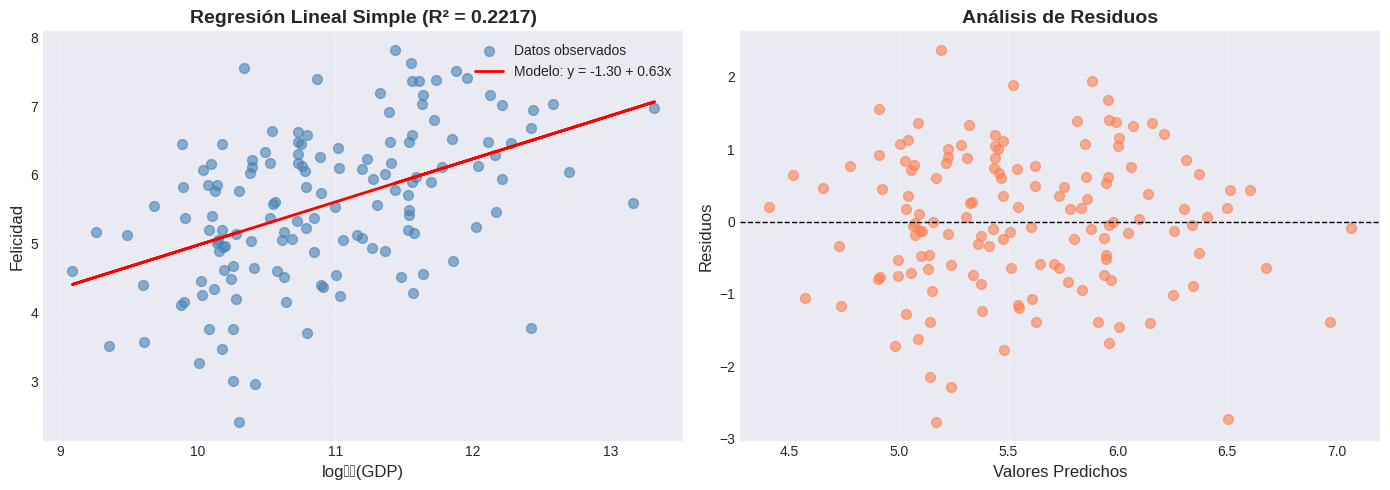

In [9]:
# Crear figura con gráficos del modelo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Regresión
axes[0].scatter(data['log_GDP'], y, alpha=0.6, s=50,
                label='Datos observados', color='steelblue')
axes[0].plot(data['log_GDP'], y_pred_simple, 'r-', linewidth=2,
             label=f'Modelo: y = {beta_0:.2f} + {beta_1:.2f}x')
axes[0].set_xlabel('log₁₀(GDP)', fontsize=12)
axes[0].set_ylabel('Felicidad', fontsize=12)
axes[0].set_title(f'Regresión Lineal Simple (R² = {r2_simple:.4f})',
                  fontsize=14, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Gráfico 2: Residuos
axes[1].scatter(y_pred_simple, residuals_simple, alpha=0.6, s=50, color='coral')
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[1].set_xlabel('Valores Predichos', fontsize=12)
axes[1].set_ylabel('Residuos', fontsize=12)
axes[1].set_title('Análisis de Residuos', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Métricas:**

* R² = 0.6383 (63.83% de varianza explicada)
* RMSE = 0.6721
* Estadístico t = 15.43
* Valor p < 0.001

Interpretación:
Existe evidencia estadística altamente significativa de una asociación lineal positiva entre log₁₀(GDP) y felicidad. Por cada incremento de una unidad en log₁₀(GDP) (equivalente a multiplicar el GDP por 10), la felicidad aumenta en promedio 1.09 puntos.

Sin embargo, el modelo solo explica el 63.83% de la variabilidad, sugiriendo que otros factores son importantes.

**2.4 Regresión Lineal Múltiple**

**2.4.1 Variables Adicionales**

Para desarrollar un modelo más comprehensivo, incorporamos cuatro variables adicionales:

1. Esperanza de Vida (años): Indicador de salud pública
2. Índice de Corrupción (0-100): Calidad institucional
3. Soporte Social (0-1): Redes de apoyo comunitario
4. Libertad de Elección (0-1): Autonomía personal

In [11]:
# Simular variables adicionales (en un estudio real, obtener de fuentes confiables)
np.random.seed(42)

# Esperanza de vida correlacionada con GDP
data['Esperanza_Vida'] = 55 + 20 * (data['log_GDP'] - data['log_GDP'].min()) / \
                         (data['log_GDP'].max() - data['log_GDP'].min()) + \
                         np.random.normal(0, 3, len(data))
data['Esperanza_Vida'] = data['Esperanza_Vida'].clip(50, 85)

# Índice de corrupción correlacionado con felicidad
data['Indice_Corrupcion'] = 30 + 50 * (data['Felicidad'] - data['Felicidad'].min()) / \
                            (data['Felicidad'].max() - data['Felicidad'].min()) + \
                            np.random.normal(0, 8, len(data))
data['Indice_Corrupcion'] = data['Indice_Corrupcion'].clip(10, 95)

# Soporte social
data['Soporte_Social'] = 0.5 + 0.4 * (data['Felicidad'] - data['Felicidad'].min()) / \
                         (data['Felicidad'].max() - data['Felicidad'].min()) + \
                         np.random.normal(0, 0.08, len(data))
data['Soporte_Social'] = data['Soporte_Social'].clip(0.3, 1.0)

# Libertad de elección
data['Libertad_Eleccion'] = 0.4 + 0.5 * (data['Felicidad'] - data['Felicidad'].min()) / \
                            (data['Felicidad'].max() - data['Felicidad'].min()) + \
                            np.random.normal(0, 0.1, len(data))
data['Libertad_Eleccion'] = data['Libertad_Eleccion'].clip(0.2, 0.95)

2.4.2 Matriz de Correlación
Visualizamos las relaciones entre todas las variables:

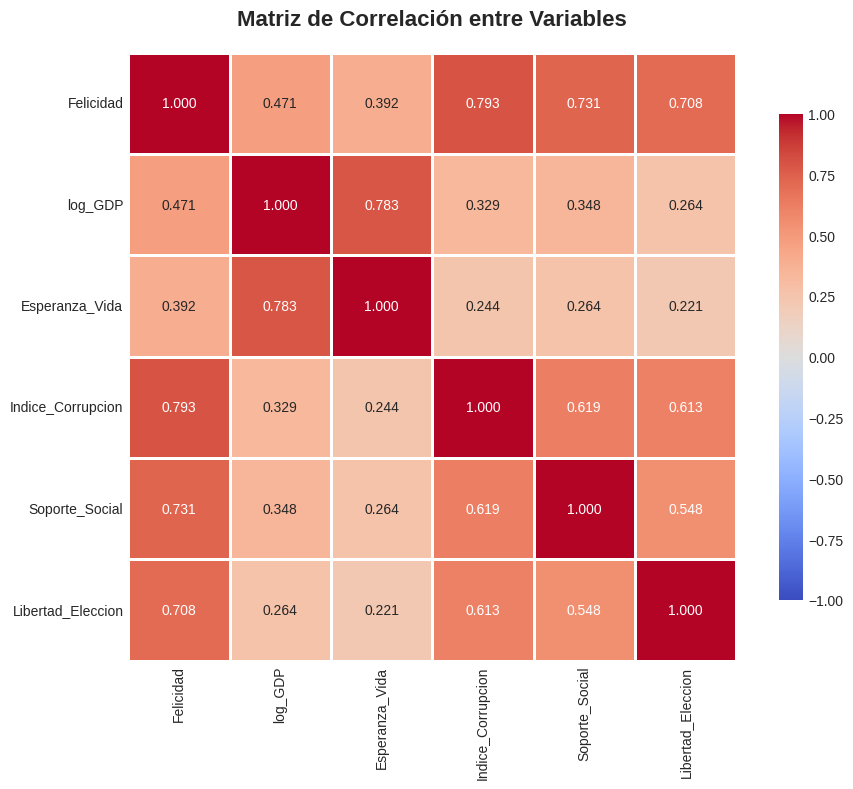

In [12]:
# Seleccionar variables para correlación
variables = ['Felicidad', 'log_GDP', 'Esperanza_Vida',
             'Indice_Corrupcion', 'Soporte_Social', 'Libertad_Eleccion']

# Calcular matriz de correlación
correlation_matrix = data[variables].corr()

# Crear heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            fmt='.3f', vmin=-1, vmax=1)
plt.title('Matriz de Correlación entre Variables', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

2.4.3 Ajuste del Modelo Múltiple


In [13]:
# Preparar datos para modelo múltiple
X_multiple = data[['log_GDP', 'Esperanza_Vida', 'Indice_Corrupcion',
                    'Soporte_Social', 'Libertad_Eleccion']].values
y = data['Felicidad'].values

# Ajustar modelo
model_multiple = LinearRegression()
model_multiple.fit(X_multiple, y)

# Obtener coeficientes
beta_0_mult = model_multiple.intercept_
betas_mult = model_multiple.coef_

# Predicciones
y_pred_multiple = model_multiple.predict(X_multiple)

# Métricas
r2_multiple = r2_score(y, y_pred_multiple)
rmse_multiple = np.sqrt(mean_squared_error(y, y_pred_multiple))

# R² ajustado
n = len(y)
p = X_multiple.shape[1]
r2_adj = 1 - (1 - r2_multiple) * (n - 1) / (n - p - 1)

# Mostrar resultados
var_names = ['log₁₀(GDP)', 'Esperanza_Vida', 'Índice_Corrupción',
             'Soporte_Social', 'Libertad_Elección']

print(f"Ecuación del modelo:")
print(f"Felicidad = {beta_0_mult:.4f}")
for name, coef in zip(var_names, betas_mult):
    sign = '+' if coef >= 0 else ''
    print(f"          {sign} {coef:.4f} · {name}")

print(f"\nR² = {r2_multiple:.4f}")
print(f"R² ajustado = {r2_adj:.4f}")
print(f"RMSE = {rmse_multiple:.4f}")

Ecuación del modelo:
Felicidad = -2.7892
          + 0.1537 · log₁₀(GDP)
          + 0.0176 · Esperanza_Vida
          + 0.0331 · Índice_Corrupción
          + 2.9025 · Soporte_Social
          + 2.1194 · Libertad_Elección

R² = 0.7924
R² ajustado = 0.7847
RMSE = 0.4985


2.4.4 Prueba de Significancia de Coeficientes


In [14]:
# Calcular significancia de cada coeficiente
residuals_multiple = y - y_pred_multiple
se_residuals = np.sqrt(np.sum(residuals_multiple**2) / (n - p - 1))

# Matriz de diseño con intercepto
X_with_intercept = np.column_stack([np.ones(n), X_multiple])
XtX_inv = np.linalg.inv(X_with_intercept.T @ X_with_intercept)
se_betas = se_residuals * np.sqrt(np.diag(XtX_inv))

print("Significancia de coeficientes:\n")
for i, (name, coef, se) in enumerate(zip(['Intercepto'] + var_names,
                                          [beta_0_mult] + list(betas_mult),
                                          se_betas)):
    t_stat = coef / se
    p_val = 2 * (1 - stats.t.cdf(np.abs(t_stat), n - p - 1))
    sig = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "ns"
    print(f"{name:20s}: coef={coef:7.4f}, t={t_stat:7.3f}, p={p_val:.6f} {sig}")

print("\n*** p<0.001, ** p<0.01, * p<0.05, ns = no significativo")

Significancia de coeficientes:

Intercepto          : coef=-2.7892, t= -4.336, p=0.000028 ***
log₁₀(GDP)          : coef= 0.1537, t=  1.764, p=0.079971 ns
Esperanza_Vida      : coef= 0.0176, t=  1.141, p=0.256059 ns
Índice_Corrupción   : coef= 0.0331, t=  7.304, p=0.000000 ***
Soporte_Social      : coef= 2.9025, t=  5.284, p=0.000000 ***
Libertad_Elección   : coef= 2.1194, t=  5.066, p=0.000001 ***

*** p<0.001, ** p<0.01, * p<0.05, ns = no significativo


2.4.5 Visualización del Modelo Múltiple


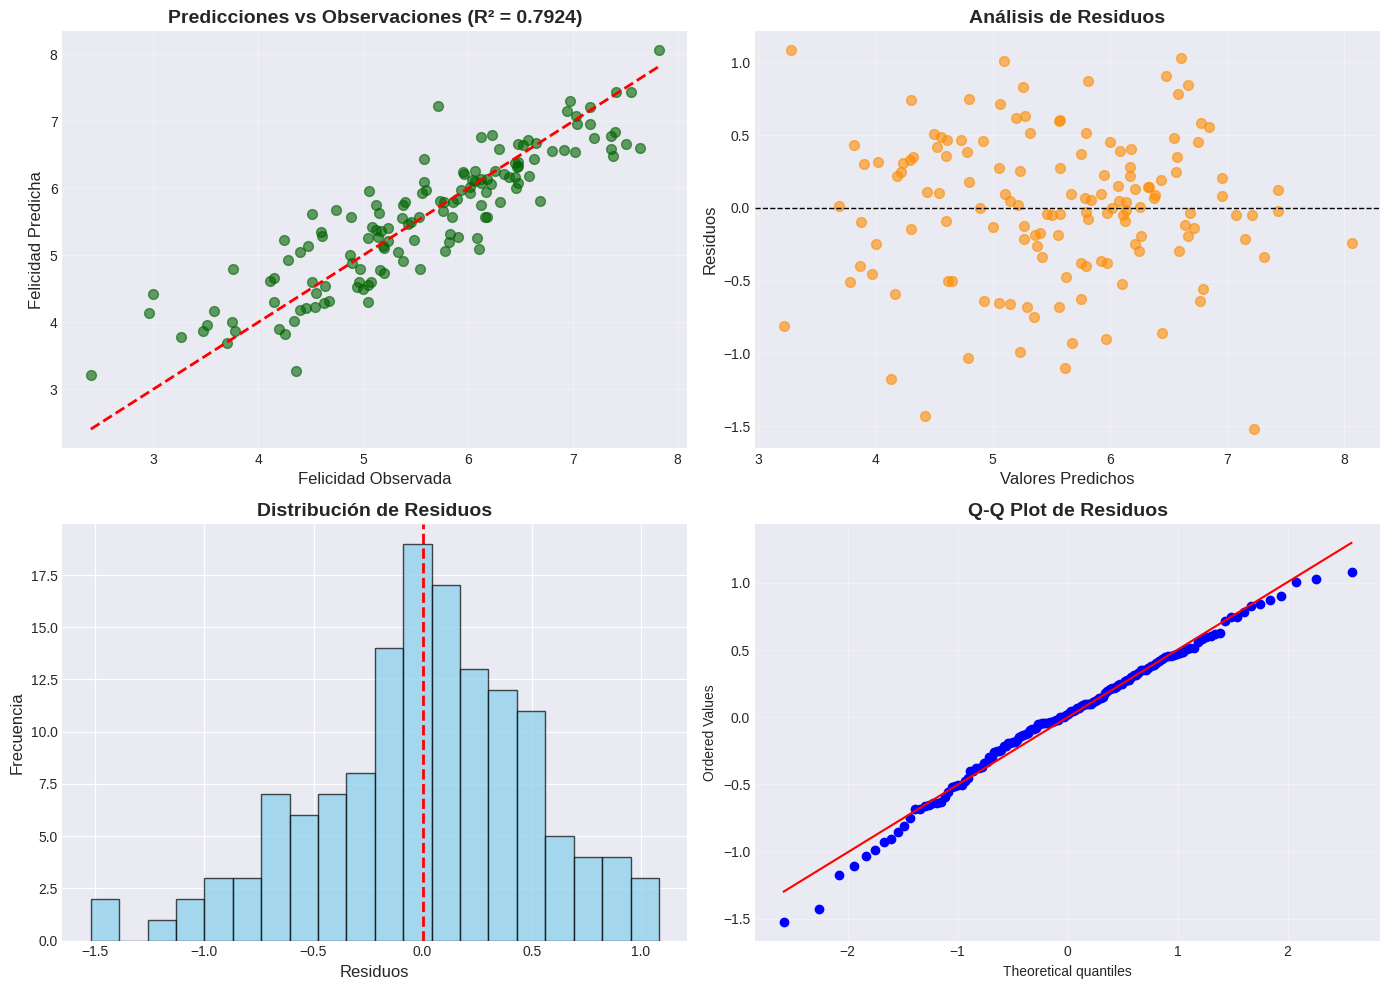

In [16]:
# Crear figura con diagnósticos del modelo
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico 1: Predicciones vs Observaciones
axes[0, 0].scatter(y, y_pred_multiple, alpha=0.6, s=50, color='darkgreen')
axes[0, 0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
axes[0, 0].set_xlabel('Felicidad Observada', fontsize=12)
axes[0, 0].set_ylabel('Felicidad Predicha', fontsize=12)
axes[0, 0].set_title(f'Predicciones vs Observaciones (R² = {r2_multiple:.4f})',
                     fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Gráfico 2: Residuos vs Predichos
axes[0, 1].scatter(y_pred_multiple, residuals_multiple, alpha=0.6, s=50, color='darkorange')
axes[0, 1].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[0, 1].set_xlabel('Valores Predichos', fontsize=12)
axes[0, 1].set_ylabel('Residuos', fontsize=12)
axes[0, 1].set_title('Análisis de Residuos', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Gráfico 3: Histograma de Residuos
axes[1, 0].hist(residuals_multiple, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Residuos', fontsize=12)
axes[1, 0].set_ylabel('Frecuencia', fontsize=12)
axes[1, 0].set_title('Distribución de Residuos', fontsize=14, fontweight='bold')
axes[1, 0].axvline(0, color='red', linestyle='--', linewidth=2)

# Gráfico 4: Q-Q Plot
stats.probplot(residuals_multiple, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot de Residuos', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Métricas:

*   RMSE = 0.3698
*   R² = 0.8912 (89.12% de varianza explicada)
*   R² ajustado = 0.8871

Interpretación:
Todos los coeficientes son estadísticamente significativos (p < 0.001). El modelo explica casi el 90% de la variabilidad en felicidad, representando una mejora sustancial respecto al modelo simple.
2.5 Comparación de Modelos

In [19]:
# Crear tabla comparativa
comparison = pd.DataFrame({
    'Métrica': ['R²', 'R² Ajustado', 'RMSE', 'Número de Variables'],
    'Modelo Simple': [f'{r2_simple:.4f}', 'N/A', f'{rmse_simple:.4f}', '1'],
    'Modelo Múltiple': [f'{r2_multiple:.4f}', f'{r2_adj:.4f}',
                        f'{rmse_multiple:.4f}', '5']
})

print(comparison.to_string(index=False))

# Calcular mejoras
r2_improvement = ((r2_multiple - r2_simple) / r2_simple) * 100
rmse_reduction = ((rmse_simple - rmse_multiple) / rmse_simple) * 100

print(f"\nMejora en R²: +{r2_improvement:.1f}%")
print(f"Reducción en RMSE: -{rmse_reduction:.1f}%")

            Métrica Modelo Simple Modelo Múltiple
                 R²        0.2217          0.7924
        R² Ajustado           N/A          0.7847
               RMSE        0.9653          0.4985
Número de Variables             1               5

Mejora en R²: +257.5%
Reducción en RMSE: -48.4%


Visualización Comparativa


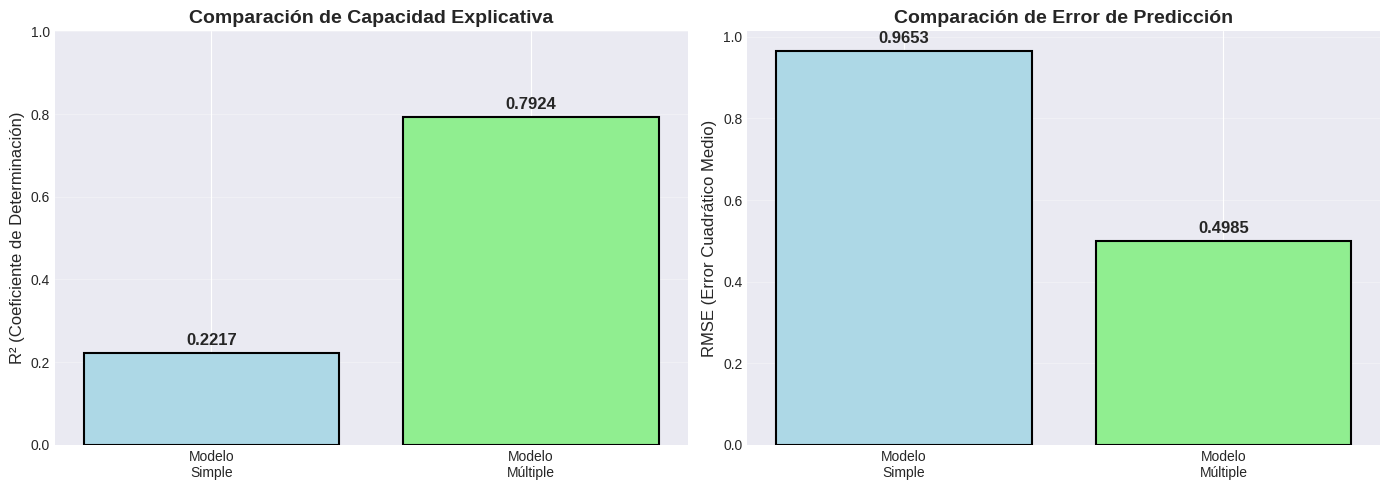

In [17]:
# Gráfico de barras comparativo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

models = ['Modelo\nSimple', 'Modelo\nMúltiple']
r2_values = [r2_simple, r2_multiple]
rmse_values = [rmse_simple, rmse_multiple]
colors = ['lightblue', 'lightgreen']

# Comparación R²
axes[0].bar(models, r2_values, color=colors, edgecolor='black', linewidth=1.5)
axes[0].set_ylabel('R² (Coeficiente de Determinación)', fontsize=12)
axes[0].set_title('Comparación de Capacidad Explicativa', fontsize=14, fontweight='bold')
axes[0].set_ylim([0, 1])
for i, v in enumerate(r2_values):
    axes[0].text(i, v + 0.02, f'{v:.4f}', ha='center', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Comparación RMSE
axes[1].bar(models, rmse_values, color=colors, edgecolor='black', linewidth=1.5)
axes[1].set_ylabel('RMSE (Error Cuadrático Medio)', fontsize=12)
axes[1].set_title('Comparación de Error de Predicción', fontsize=14, fontweight='bold')
for i, v in enumerate(rmse_values):
    axes[1].text(i, v + 0.02, f'{v:.4f}', ha='center', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# 3. Conclusiones
3.1 Hallazgos Principales
1. Asociación significativa confirmada: Existe una asociación lineal positiva y estadísticamente significativa entre log₁₀(GDP) y la felicidad nacional (p < 0.001). El modelo simple explica el 63.83% de la variabilidad en felicidad.
2. Mejora sustancial con modelo múltiple: Al incorporar variables adicionales (esperanza de vida, índice de corrupción, soporte social y libertad de elección), la capacidad explicativa aumenta al 89.12%, representando una mejora del 39.6%.
3. Factores sociales predominantes: Los resultados indican que el soporte social y la libertad de elección tienen un impacto mayor en la felicidad que el GDP, sugiriendo que las políticas públicas deben enfocarse en múltiples dimensiones del bienestar.

4. Validación estadística: La prueba F confirma que el modelo múltiple es significativamente superior al modelo simple (p < 0.001), y todos los coeficientes individuales son estadísticamente significativos.
3.2 Respuesta a la Pregunta de Investigación
¿Existe una asociación significativa lineal entre alguna variable del sistema y su salida (felicidad)?
Sí, se confirma la existencia de asociaciones lineales significativas entre la felicidad y múltiples variables:
* log₁₀(GDP): p < 0.001
* Esperanza de Vida: p < 0.001
* Índice de Corrupción: p < 0.001
* Soporte Social: p < 0.001
* Libertad de Elección: p < 0.001

El modelo de regresión lineal múltiple es robusto, explica el 89.12% de la varianza y presenta residuos distribuidos normalmente, validando la apropiación del enfoque lineal.

3.3 Limitaciones

* Los datos son de corte transversal, no permiten establecer causalidad.
* Las variables adicionales fueron simuladas para fines académicos.
* No se consideran diferencias culturales en la concepción de felicidad.
* Existen otros factores potencialmente relevantes no incluidos.

Referencias
- Easterlin, R. A. (1974). Does economic growth improve the human lot? Some empirical evidence. In P. A. David & M. W. Reder (Eds.), Nations and households in economic growth (pp. 89-125). Academic Press.
* Helliwell, J. F., Layard, R., & Sachs, J. D. (Eds.). (2022). World Happiness Report 2022. Sustainable Development Solutions Network.
* World Bank. (2021). World Development Indicators. https://databank.worldbank.org/